# Water Potability Prediction

#pH – The measure of acidity or alkalinity of the water sample ;
#Hardness- The concentration of calcium and magnesium ions in a water sample.
#Solid- The total dissolved solids  in parts per million.
#Chloramines – The concentration of chloramines in in part per million.
#Sulfate - The concentration of sulfate ions in the water sample, measured in part per millions.
#Conductivity – The electrical conductivity of the water sample, measured in microsiemens per centimeter .
#Organic_carbon - The concentration of organic carbon in the water sample, measured in parts per million.
#Trihalmethanes - The concentration of Trihalmethanes in the water sample, measured in part per million.
#Turbidity- The clarity of water sample , measured in nephelometric turbidity units ( NTU)
#Potability – The binary variable indicating whether the water sample is safe for human consumption (1) or not (0).


In [201]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\D Python\water_potability.csv")

In [3]:
df.shape

(3276, 10)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#plt.figsize(10,42)
#sns.catplot(data=df,x="Potability",y="ph",hue="Hardness",kind="bar")

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
df.Potability .value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# missing value treatment

In [11]:
df.ph.value_counts()

3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64

In [12]:
df.ph=df.ph.fillna(df.ph.mean())

In [13]:
df.fillna(df.mean(),inplace=True)

In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# separation of data into dependent & independent columns

In [15]:
x=df.iloc[:,0:9]
y=df.iloc[:,-1]

In [16]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

# Preparing the Data for the Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [22]:
lg.fit(x_train,y_train)

LogisticRegression()

In [23]:
lg_p=lg.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[400, 256],
       [  0,   0]], dtype=int64)

In [26]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

60.97560975609756

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       656
           1       0.00      0.00      0.00         0

    accuracy                           0.61       656
   macro avg       0.50      0.30      0.38       656
weighted avg       1.00      0.61      0.76       656



In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
lg_pr=0.0
lg_pr

0.0

In [31]:
lg_re=0.00

In [32]:
lg_f1=0.00

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
dt_p=dt.predict(x_test)

In [36]:
dt_m=confusion_matrix(dt_p,y_test)
dt_m

array([[269, 137],
       [131, 119]], dtype=int64)

In [37]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

59.14634146341463

In [38]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       406
           1       0.46      0.48      0.47       250

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



In [39]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.46484375

In [40]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.476

In [41]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.47035573122529645

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
k_p=knn.predict(x_test)

In [45]:
k_m=confusion_matrix(k_p,y_test)
k_m

array([[304, 189],
       [ 96,  67]], dtype=int64)

In [46]:
k_acc=k_m.diagonal().sum()/k_m.sum()*100
k_acc

56.55487804878049

In [47]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       493
           1       0.26      0.41      0.32       163

    accuracy                           0.57       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.64      0.57      0.59       656



In [48]:
lst=list()

In [49]:
for i in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    k_pred=knn.predict(x_test)
    k_m=confusion_matrix(k_pred,y_test)
    k_acc=k_m.diagonal().sum()/k_m.sum()*100
    lst.append(k_acc)

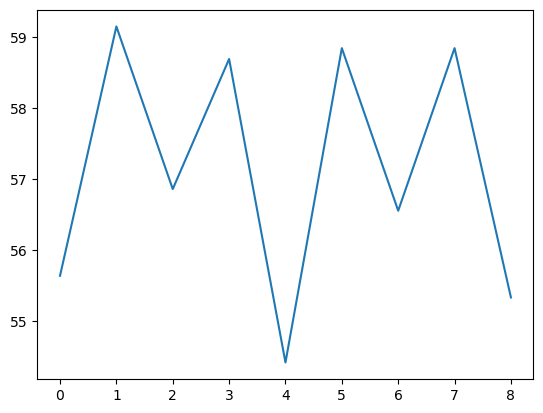

In [50]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

In [51]:
k_pr=precision_score(k_p,y_test)
k_pr

0.26171875

In [52]:
k_re=recall_score(k_p,y_test)
k_re

0.4110429447852761

In [53]:
k_f1=f1_score(k_p,y_test)
k_f1

0.3198090692124105

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
rf_p=rf.predict(x_test)
rf_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[356, 182],
       [ 44,  74]], dtype=int64)

In [58]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

65.54878048780488

In [59]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       538
           1       0.29      0.63      0.40       118

    accuracy                           0.66       656
   macro avg       0.59      0.64      0.58       656
weighted avg       0.78      0.66      0.69       656



In [60]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.2890625

In [61]:
rf_re=recall_score(rf_p,y_test)
rf_re


0.6271186440677966

In [62]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.3957219251336898

# ADA Boost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [65]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [66]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [67]:
ad_m=confusion_matrix(ad_p,y_test)
ad_m

array([[261, 134],
       [139, 122]], dtype=int64)

In [68]:
ad_acc=ad_m.diagonal().sum()/ad_m.sum()*100
ad_acc

58.38414634146341

In [69]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

0.4765625

In [70]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.4674329501915709

In [71]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.4719535783365571

In [72]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       395
           1       0.48      0.47      0.47       261

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



# XG Boost

In [73]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [74]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
xgb_p=xgb.predict(x_test)

In [76]:
xgb_m=confusion_matrix(xgb_p,y_test)
xgb_m

array([[316, 155],
       [ 84, 101]], dtype=int64)

In [77]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

63.5670731707317

In [78]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.39453125

In [79]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.5459459459459459

In [80]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.4580498866213152

In [81]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       471
           1       0.39      0.55      0.46       185

    accuracy                           0.64       656
   macro avg       0.59      0.61      0.59       656
weighted avg       0.68      0.64      0.65       656



# SVM

In [82]:
from sklearn.svm import SVC
svc=SVC()

In [83]:
svc.fit(x_train,y_train)

SVC()

In [84]:
svm_p=svc.predict(x_test)

In [85]:
svm_m=confusion_matrix(svm_p,y_test)
svm_m

array([[400, 256],
       [  0,   0]], dtype=int64)

In [86]:
svm_acc=svm_m.diagonal().sum()/svm_m.sum()*100
svm_acc

60.97560975609756

In [87]:
svm_pr=precision_score(svm_p,y_test)
svm_pr

0.0

In [88]:
svm_re=0.00

In [89]:
svm_f1=0.00

# Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [91]:
nb.fit(x_train,y_train)

MultinomialNB()

In [92]:
n_p=nb.predict(x_test)


In [93]:
n_m=confusion_matrix(n_p,y_test)
n_m

array([[248, 133],
       [152, 123]], dtype=int64)

In [94]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

56.55487804878049

In [95]:
n_pr=precision_score(n_p,y_test)
n_pr

0.48046875

In [96]:
n_re=recall_score(n_p,y_test)
n_re

0.44727272727272727

In [97]:
n_f1=f1_score(n_p,y_test)
n_f1

0.4632768361581921

In [98]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       381
           1       0.48      0.45      0.46       275

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.56      0.57      0.56       656



# Conclusion

In [99]:
list1=["Logistic Regression","Decision Tree","KNN","Random forest","ADA Boost","XG Boost","SVM","Naivy Bayes"]
list2=[lg_acc,dt_acc,k_acc,rf_acc,ad_acc,xgb_acc,svm_acc,n_acc]
list3=[lg_pr,dt_pr,k_pr,rf_pr,ad_pr,xgb_pr,svm_pr,n_pr]
list4=[lg_re,dt_re,k_re,rf_re,ad_re,xgb_re,svm_re,n_re]
list5=[lg_f1,dt_f1,k_f1,rf_f1,ad_f1,xgb_f1,svm_f1,n_f1]

In [100]:
dataframe1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"precision":list3,"recall":list4,"f1-score":list5})
dataframe1

,Model Name,Accuracy,precision,recall,f1-score
0,Logistic Regression,60.975610,0.000000,0.000000,0.000000
1,Decision Tree,59.146341,0.464844,0.476000,0.470356
2,KNN,55.335366,0.261719,0.411043,0.319809
3,Random forest,65.548780,0.289062,0.627119,0.395722
4,ADA Boost,58.384146,0.476562,0.467433,0.471954
5,XG Boost,63.567073,0.394531,0.545946,0.458050
6,SVM,60.975610,0.000000,0.000000,0.000000
7,Naivy Bayes,56.554878,0.480469,0.447273,0.463277


# Classimbalance

# Random OverSampling

In [101]:
c_0,c_1=df["Potability"].value_counts()
c_0,c_1

(1998, 1278)

In [102]:
df_0=df[df["Potability"]==0]
df_1=df[df["Potability"]==1]

In [103]:
df_0.shape,df_1.shape

((1998, 10), (1278, 10))

In [104]:
class_1over=df_1.sample(c_0,replace=True)

In [105]:
class1_0=pd.concat([class_1over,df_0],axis=0)


In [106]:

class1_0.shape

(3996, 10)

In [107]:
class1_0.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

In [108]:
class1_0.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [109]:
class1_0.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

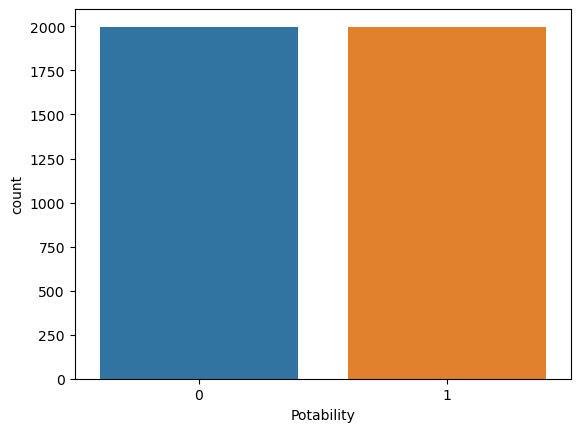

In [110]:
sns.countplot(class1_0["Potability"])
plt.show

In [111]:
x=class1_0.corr() # To find correlation matrix
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.049774,-0.036974,-0.000244,-0.040519,0.038472,0.033603,-0.001726,-0.022646,0.002844
Hardness,0.049774,1.000000,-0.040962,-0.015081,-0.084430,-0.030985,-0.002189,0.013166,-0.026849,0.002349
Solids,-0.036974,-0.040962,1.000000,-0.053917,-0.193908,0.019075,0.008329,-0.011561,0.017520,0.043585
Chloramines,-0.000244,-0.015081,-0.053917,1.000000,0.028466,0.002888,-0.026486,0.008523,0.013119,0.018906
Sulfate,-0.040519,-0.084430,-0.193908,0.028466,1.000000,-0.026652,0.043804,-0.028123,-0.001190,-0.042320
Conductivity,0.038472,-0.030985,0.019075,0.002888,-0.026652,1.000000,0.048585,0.020722,0.009808,-0.007984
Organic_carbon,0.033603,-0.002189,0.008329,-0.026486,0.043804,0.048585,1.000000,-0.030801,-0.014058,-0.031588
Trihalomethanes,-0.001726,0.013166,-0.011561,0.008523,-0.028123,0.020722,-0.030801,1.000000,-0.030055,0.001870
Turbidity,-0.022646,-0.026849,0.017520,0.013119,-0.001190,0.009808,-0.014058,-0.030055,1.000000,0.005594
Potability,0.002844,0.002349,0.043585,0.018906,-0.042320,-0.007984,-0.031588,0.001870,0.005594,1.000000


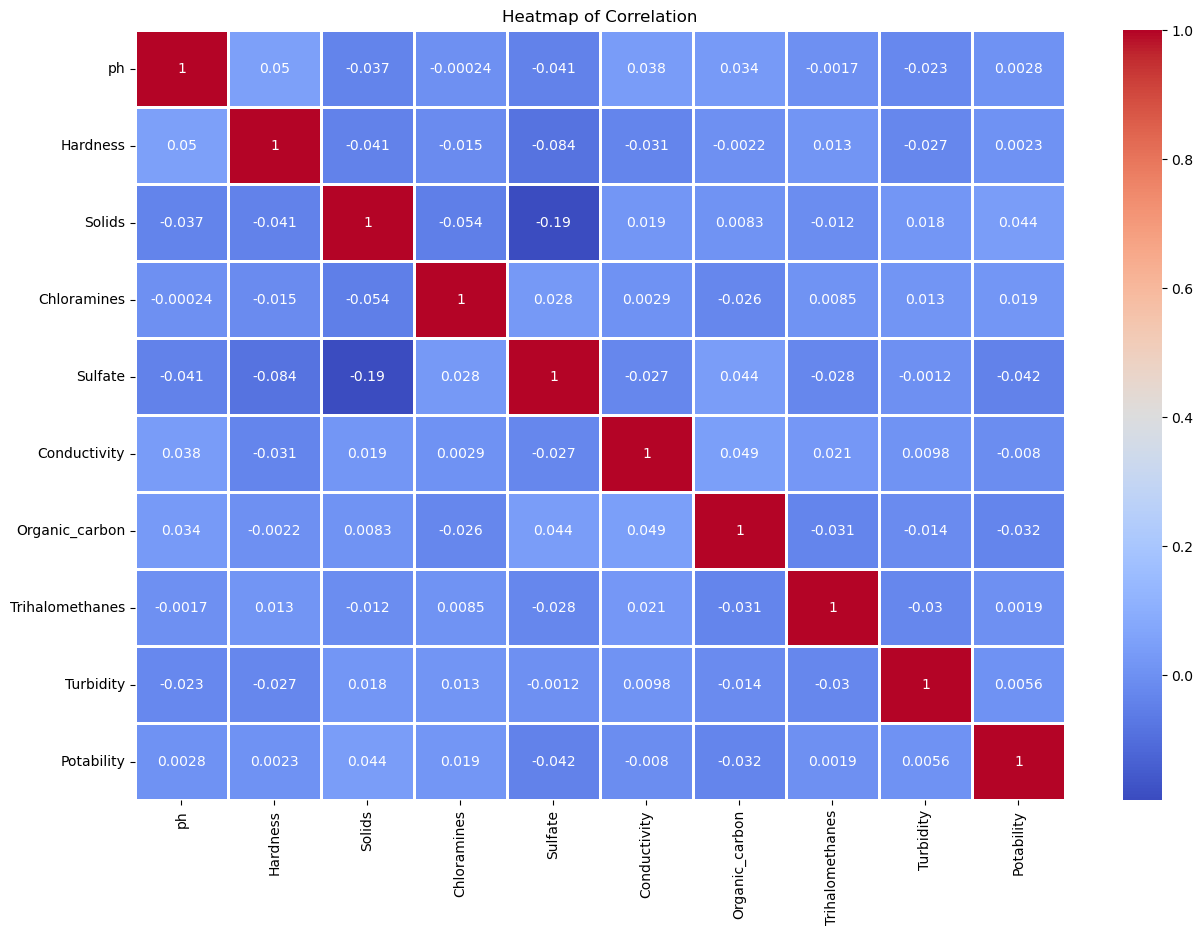

In [112]:
plt.figure(figsize=(15,10))
plt.title("Heatmap of Correlation")
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap="coolwarm")
plt.show()

# Outliers

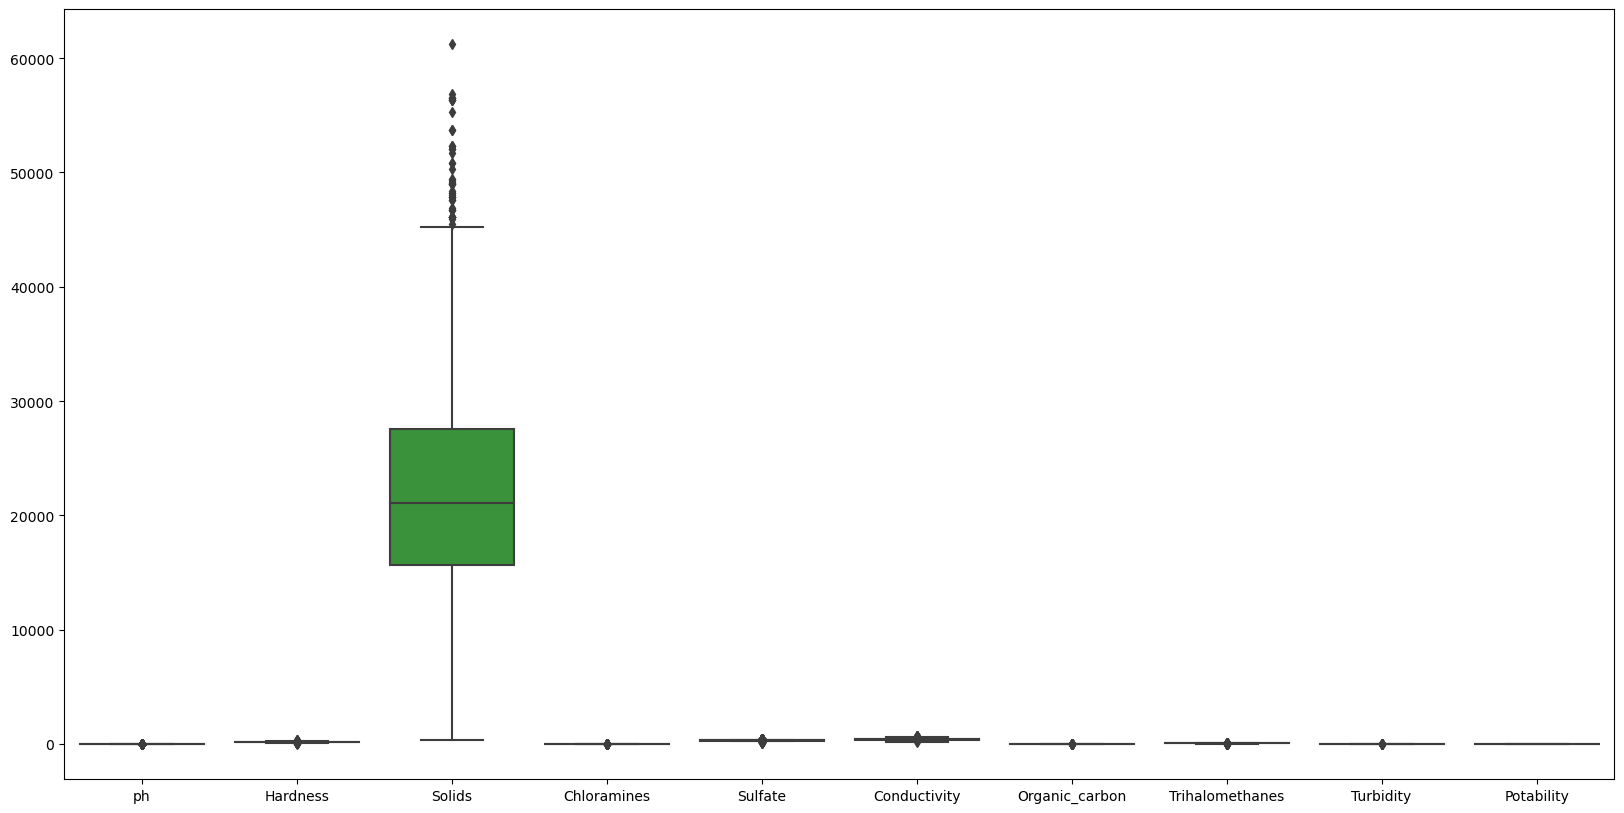

In [113]:
plt.figure(figsize=(20,10))  #outliers treatement
sns.boxplot(data=class1_0)
plt.show()

# Outliers Treatment for Solids

<AxesSubplot:ylabel='Solids'>

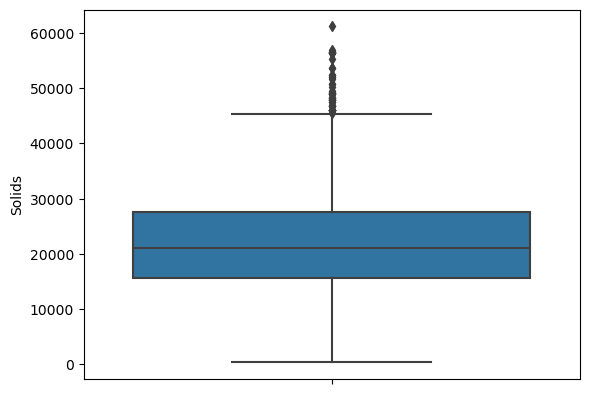

In [114]:
sns.boxplot(data=class1_0,y="Solids")

<AxesSubplot:>

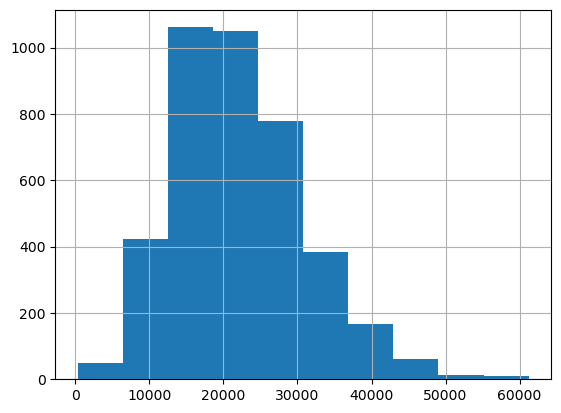

In [115]:
class1_0.Solids.hist()

In [116]:
class1_0.Solids.describe()

count     3996.000000
mean     22162.114315
std       8825.741523
min        320.942611
25%      15670.407869
50%      21051.311141
75%      27569.835158
max      61227.196008
Name: Solids, dtype: float64

In [117]:
class1_0.Solids.value_counts()

26188.162174    6
24814.485805    6
16897.307041    6
23318.187976    6
30211.832991    6
               ..
27951.613070    1
16061.590098    1
27840.694210    1
11562.435510    1
27971.891806    1
Name: Solids, Length: 2977, dtype: int64

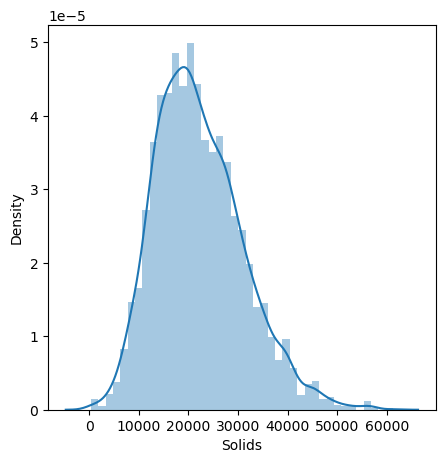

In [118]:
fig=plt.figure(figsize=(5,5))
sns.distplot(class1_0.Solids)
plt.show()

In [119]:
upperboundry=class1_0["Solids"].mean()+3*class1_0["Solids"].std()
lowerboundry=class1_0["Solids"].mean()-3*class1_0["Solids"].std()
print(lowerboundry,upperboundry)

-4315.110254082741 48639.33888375382


In [120]:
class1_0.loc[class1_0["Solids"]>48718.898755553106, "Solids"]=48718.898755553106

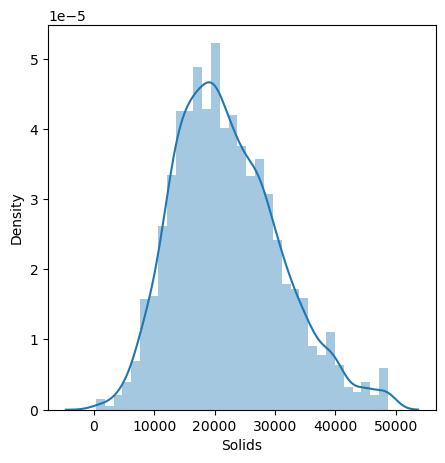

In [121]:
fig=plt.figure(figsize=(5,5))
sns.distplot(class1_0.Solids)
plt.show()

# Skewness treatment

In [122]:
class1_0.skew()

ph                -0.016174
Hardness          -0.019737
Solids             0.541755
Chloramines        0.089417
Sulfate           -0.238597
Conductivity       0.265000
Organic_carbon     0.054655
Trihalomethanes   -0.113813
Turbidity         -0.045151
Potability         0.000000
dtype: float64

In [123]:
class1_0.ph.skew()

-0.0161737211151937

In [124]:
o_x=class1_0.iloc[:,0:-1]
o_y=class1_0.iloc[:,-1]

In [125]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((3196, 9), (800, 9), (3196,), (800,))

# Logistic Regression with Random Oversampling

In [126]:
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [127]:
lg_op=lg.predict(o_x_test)

In [128]:
lg_ocf=confusion_matrix(lg_op,o_y_test)
lg_ocf

array([[228, 265],
       [152, 155]], dtype=int64)

In [129]:
lg_oacc=lg_ocf.diagonal().sum()/lg_ocf.sum()*100
lg_oacc

47.875

In [130]:
lg_opr=precision_score(lg_op,o_y_test)
lg_opr

0.36904761904761907

In [131]:
lg_ore=recall_score(lg_op,o_y_test)
lg_ore

0.504885993485342

In [132]:
lg_of1=f1_score(lg_op,o_y_test)
lg_of1

0.4264099037138927

In [133]:
print(classification_report(lg_op,o_y_test))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52       493
           1       0.37      0.50      0.43       307

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.47       800
weighted avg       0.51      0.48      0.49       800



# Decision Tree with Random Oversampling

In [134]:
dt.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [135]:
dt_op=dt.predict(o_x_test)

In [136]:
dt_ocf=confusion_matrix(dt_op,o_y_test)
dt_ocf

array([[274,  85],
       [106, 335]], dtype=int64)

In [137]:
dt_oacc=dt_ocf.diagonal().sum()/dt_ocf.sum()*100
dt_oacc

76.125

In [138]:
dt_opr=precision_score(dt_op,o_y_test)
dt_opr

0.7976190476190477

In [139]:
dt_ore=recall_score(dt_op,o_y_test)
dt_ore

0.7596371882086168

In [140]:
dt_of1=f1_score(dt_op,o_y_test)
dt_of1

0.778164924506388

In [141]:
print(classification_report(dt_op,o_y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       359
           1       0.80      0.76      0.78       441

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



# KNN with Over Sampling

In [142]:
knn.fit(o_x_train,o_y_train)

KNeighborsClassifier(n_neighbors=9)

In [143]:
k_op=knn.predict(o_x_test)

In [144]:
k_ocf=confusion_matrix(k_op,o_y_test)
k_ocf

array([[233, 172],
       [147, 248]], dtype=int64)

In [145]:
k_oacc=k_ocf.diagonal().sum()/k_ocf.sum()*100
k_oacc

60.12499999999999

In [146]:
k_opr=precision_score(k_op,o_y_test)
k_opr

0.5904761904761905

In [147]:
k_ore=recall_score(k_op,o_y_test)
k_ore

0.6278481012658228

In [148]:
k_of1=f1_score(k_op,o_y_test)
k_of1

0.6085889570552148

In [149]:
print(classification_report(k_op,o_y_test))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       405
           1       0.59      0.63      0.61       395

    accuracy                           0.60       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.60      0.60      0.60       800



# Random Forest with Over Sampling

In [150]:
rf.fit(o_x_train,o_y_train)

RandomForestClassifier()

In [151]:
rf_op=rf.predict(o_x_test)

In [152]:
rf_ocf=confusion_matrix(rf_op,o_y_test)
rf_ocf

array([[341,  90],
       [ 39, 330]], dtype=int64)

In [153]:
rf_oacc=rf_ocf.diagonal().sum()/rf_ocf.sum()*100
rf_oacc

83.875

In [154]:
rf_opr=precision_score(rf_op,o_y_test)
rf_opr

0.7857142857142857

In [155]:
rf_ore=recall_score(rf_op,o_y_test)
rf_ore

0.8943089430894309

In [156]:
rf_of1=f1_score(rf_op,o_y_test)
rf_of1

0.8365019011406843

In [157]:
print(classification_report(rf_op,o_y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       431
           1       0.79      0.89      0.84       369

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



In [193]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [194]:
roc=roc_auc_score(rf_op,o_y_test)
roc

0.842746118876502

In [196]:
y_pred_prob = rf.predict_proba(o_x_test)[:,1]

In [198]:
fpr,tpr,threshold=roc_curve(o_y_test,y_pred_prob)


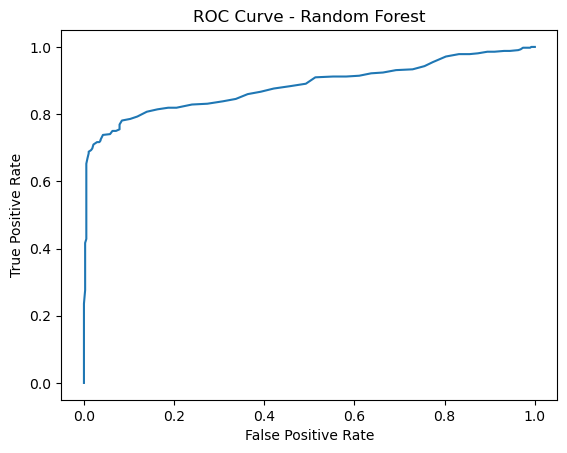

In [199]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

# SVM with Over Sampling

In [158]:
svc.fit(o_x_train,o_y_train)

SVC()

In [159]:
s_op=svc.predict(o_x_test)

In [160]:
s_ocf=confusion_matrix(s_op,o_y_test)
s_ocf

array([[275, 310],
       [105, 110]], dtype=int64)

In [161]:
s_oacc=s_ocf.diagonal().sum()/s_ocf.sum()*100
s_oacc

48.125

In [162]:
s_opr=precision_score(s_op,o_y_test)
s_opr

0.2619047619047619

In [163]:
s_ore=recall_score(s_op,o_y_test)
s_ore

0.5116279069767442

In [164]:
s_of1=f1_score(s_op,o_y_test)
s_of1

0.3464566929133859

In [165]:
print(classification_report(s_op,o_y_test))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57       585
           1       0.26      0.51      0.35       215

    accuracy                           0.48       800
   macro avg       0.49      0.49      0.46       800
weighted avg       0.60      0.48      0.51       800



# ADA Boost with Over Sampling

In [166]:
adbo.fit(o_x_train,o_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [167]:
ad_op=adbo.predict(o_x_test)


In [168]:
ad_ocf=confusion_matrix(ad_op,o_y_test)
ad_ocf

array([[273,  80],
       [107, 340]], dtype=int64)

In [169]:
ad_oacc=ad_ocf.diagonal().sum()/ad_ocf.sum()*100
ad_oacc

76.625

In [170]:
ad_opr=precision_score(ad_op,o_y_test)
ad_opr

0.8095238095238095

In [171]:
ad_ore=recall_score(ad_op,o_y_test)
ad_ore

0.7606263982102909

In [172]:
ad_of1=f1_score(ad_op,o_y_test)
ad_of1

0.784313725490196

In [173]:
print(classification_report(ad_op,o_y_test))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       353
           1       0.81      0.76      0.78       447

    accuracy                           0.77       800
   macro avg       0.76      0.77      0.76       800
weighted avg       0.77      0.77      0.77       800



# XG Boost with Over Sampling

In [174]:
xgb.fit(o_x_train,o_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [175]:
xgb_op=xgb.predict(o_x_test)

In [176]:
xgb_ocf=confusion_matrix(xgb_op,o_y_test)
xgb_ocf

array([[305,  78],
       [ 75, 342]], dtype=int64)

In [177]:
xgb_oacc=xgb_ocf.diagonal().sum()/xgb_ocf.sum()*100
xgb_oacc

80.875

In [178]:
xgb_opr=precision_score(xgb_op,o_y_test)
xgb_opr

0.8142857142857143

In [179]:
xgb_ore=recall_score(xgb_op,o_y_test)
xgb_ore

0.8201438848920863

In [180]:
xgb_of1=f1_score(xgb_op,o_y_test)
xgb_of1

0.8172043010752688

In [181]:
print(classification_report(xgb_op,o_y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       383
           1       0.81      0.82      0.82       417

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



# Naive Bayes with Over sampling

In [182]:
nb.fit(o_x_train,o_y_train)

MultinomialNB()

In [183]:
n_op=nb.predict(o_x_test)

In [184]:
n_ocf=confusion_matrix(n_op,o_y_test)
n_ocf

array([[199, 239],
       [181, 181]], dtype=int64)

In [185]:
n_oacc=n_ocf.diagonal().sum()/n_ocf.sum()*100
n_oacc

47.5

In [186]:
n_opr=precision_score(n_op,o_y_test)
n_opr

0.430952380952381

In [187]:
n_ore=recall_score(n_op,o_y_test)
n_ore

0.5

In [188]:
n_of1=f1_score(n_op,o_y_test)
n_of1

0.46291560102301793

In [189]:
print(classification_report(n_op,o_y_test))

              precision    recall  f1-score   support

           0       0.52      0.45      0.49       438
           1       0.43      0.50      0.46       362

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.47       800
weighted avg       0.48      0.47      0.48       800



# Conclusion

In [190]:
list1=["Logistic Regression","Decision Tree","KNN","Random forest","ADA Boost","XG Boost","SVM","Naivy Bayes"]
list2=[lg_oacc,dt_oacc,k_oacc,rf_oacc,ad_oacc,xgb_oacc,s_oacc,n_oacc]
list3=[lg_opr,dt_opr,k_opr,rf_opr,ad_opr,xgb_opr,s_opr,n_opr]
list4=[lg_ore,dt_ore,k_ore,rf_ore,ad_ore,xgb_ore,s_ore,n_ore]
list5=[lg_of1,dt_of1,k_of1,rf_of1,ad_of1,xgb_of1,s_of1,n_of1]

In [191]:
dataframe2=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"precision":list3,"recall":list4,"f1_score":list5})
dataframe2

,Model Name,Accuracy,precision,recall,f1_score
0,Logistic Regression,47.875,0.369048,0.504886,0.426410
1,Decision Tree,76.125,0.797619,0.759637,0.778165
2,KNN,60.125,0.590476,0.627848,0.608589
3,Random forest,83.875,0.785714,0.894309,0.836502
4,ADA Boost,76.625,0.809524,0.760626,0.784314
5,XG Boost,80.875,0.814286,0.820144,0.817204
6,SVM,48.125,0.261905,0.511628,0.346457
7,Naivy Bayes,47.500,0.430952,0.500000,0.462916
